In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('cleveland_heart_attr.csv')

### I)

In [4]:
print('Number of rows is ',len(df))
print('Number of columns is ',df.shape[1])

Number of rows is  303
Number of columns is  14


### 2)

In [5]:
print('unique values in thal column',df.thal.unique())
print('unique values in num_major_vessels_fluroscopy column',df.num_major_vessels_fluroscopy.unique())

unique values in thal column ['6.0' '3.0' '7.0' '?']
unique values in num_major_vessels_fluroscopy column ['0.0' '3.0' '2.0' '1.0' '?']


Since both these columns also have a question mark in some cells (possibly to denote missing values) they cannot be defined by only a numeric attribute. Hence , datatype is object

### 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc05226fd0>]],
      dtype=object)

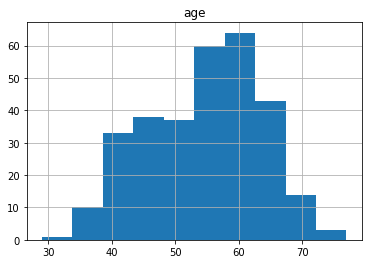

In [6]:
df.hist(column='age')

Number of bins is 10. Bin size is 4.8

### 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc05119750>]],
      dtype=object)

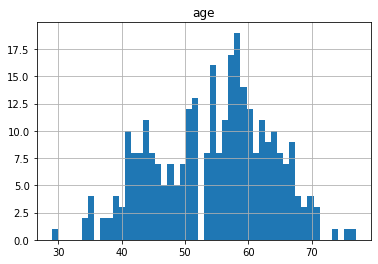

In [7]:
df.hist(column='age',bins=50)

Bin size is 0.96. Since bin size is less than precision of age attribute, each bin contains exactly 1 value of age , and height of each bin just gives the frequency of the age value that corresponds to that bin. 

### 5)

KDE is useful to provide a more smooth and continuous representation of the distribution.It can also be interpreted as the shape of the probability density function of the distribution. 

### 6)

Number of bins: default


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc04c98250>]],
      dtype=object)

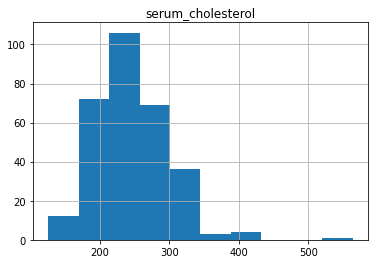

In [8]:
print('Number of bins: default')
df.hist(column='serum_cholesterol')

Number of bins: 20


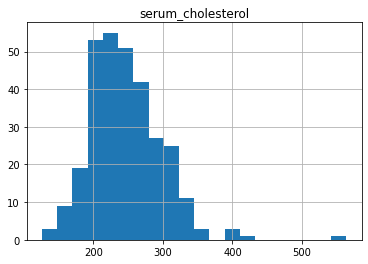




Number of bins: 50


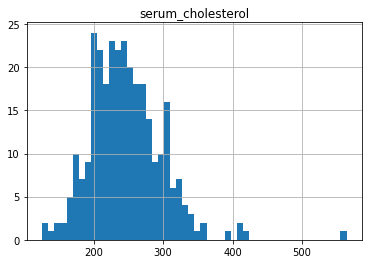




Number of bins: 100


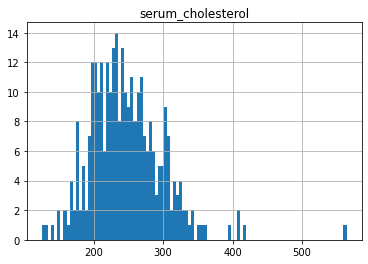




Number of bins: 200


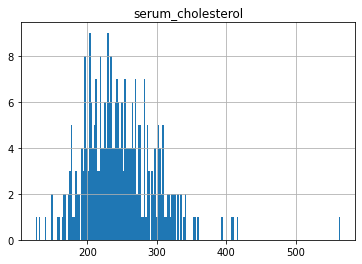




Number of bins: 500


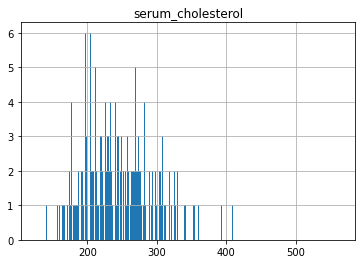

In [9]:
for bins in [20,50,100,200,500]:
    print('Number of bins:',bins)
    hist=df.hist(column='serum_cholesterol',bins=bins)
    plt.show()
    print('\n'*2)

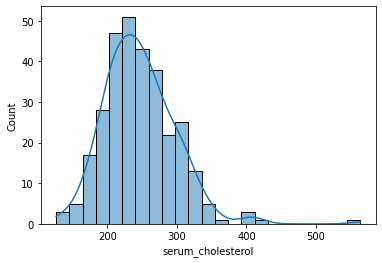

In [10]:
sns.histplot(df.serum_cholesterol,kde=True)

Number of bins: 20


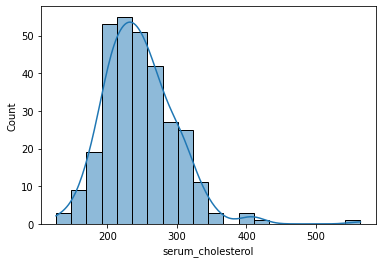




Number of bins: 50


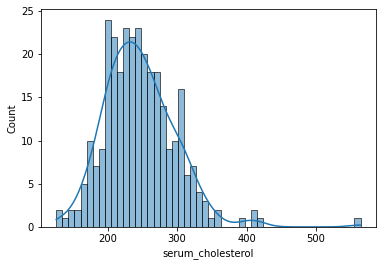




Number of bins: 100


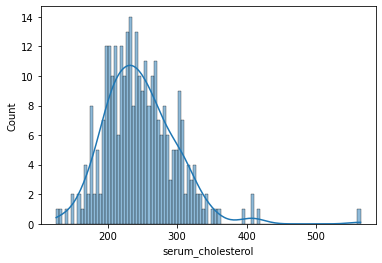




Number of bins: 200


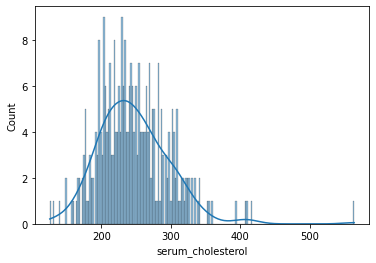




Number of bins: 500


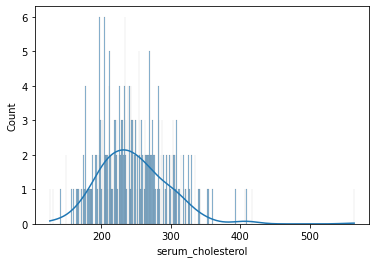

In [11]:
for bins in [20,50,100,200,500]:
    print('Number of bins:',bins)
    hist=sns.histplot(df.serum_cholesterol,bins=bins,kde=True)
    plt.show()
    print('\n'*2)

The scale of the kde curve keeps decreasing as the number of bins increases, although its shape is more or less the same. This is because each bin gets divided into bins of smaller sizes and the number of observations would be divided among these smaller bins. 

### 7)

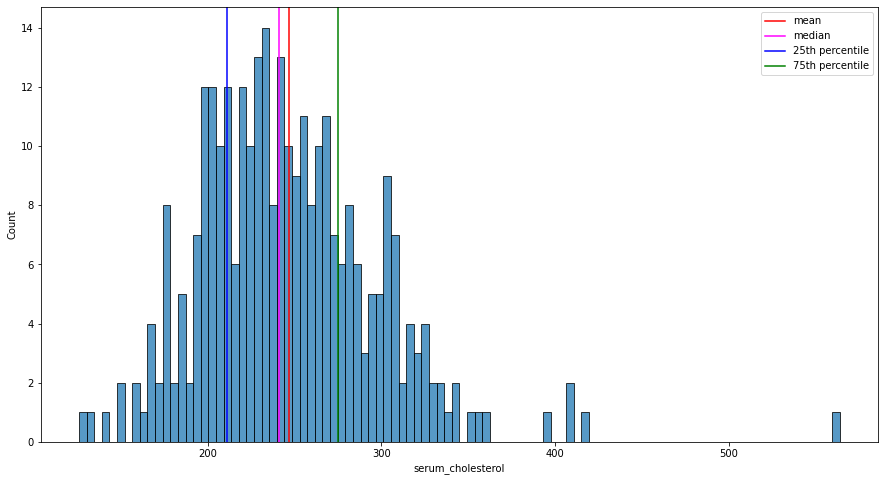

In [12]:
plt.figure(figsize=(15,8))
sns.histplot(df.serum_cholesterol, bins=100)
plt.axvline(x=np.mean(df.serum_cholesterol),color='red',label='mean')
plt.axvline(x=np.median(df.serum_cholesterol),color='magenta',label='median')
plt.axvline(x = np.percentile(df.serum_cholesterol,25),color='blue',label='25th percentile')
plt.axvline(x = np.percentile(df.serum_cholesterol,75),color='green',label='75th percentile')
plt.legend(loc='upper right')

### 8)

In [13]:
df['gender'] = np.where(df['sex']==1.0,'male','female')

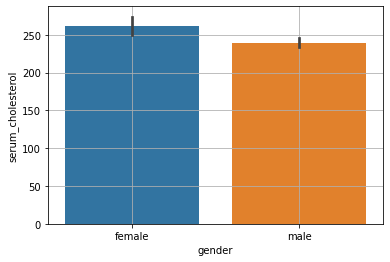

In [14]:
sns.barplot(x="gender",y="serum_cholesterol",data=df,order=['female','male'])
plt.grid()

### 9)

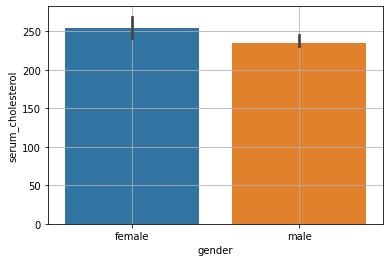

In [15]:
sns.barplot(x="gender",y="serum_cholesterol",data=df,order=['female','male'], estimator=np.median)
plt.grid()

In [16]:
print('Mean:',np.mean(df.serum_cholesterol[df.gender=='female']))
print('Median:',np.median(df.serum_cholesterol[df.gender=='female']))

Mean: 261.7525773195876
Median: 254.0


The below plot plots the median of the values of serum cholesterol for each gender while the the original plot plots the average value. We can see that for females, the median is slightly less than the mean, and with the help of the gridlines, we can see that the height of the bar (female) is slightly less than in the previous plot 

### 10)

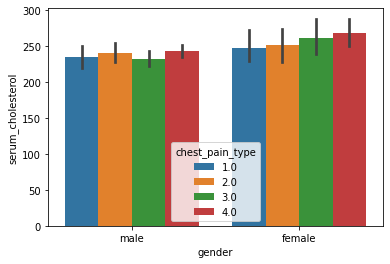

In [17]:
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)

In males, the average serum cholesterol levels is more less the same across all 4 chest pain types, however in females, the average cholesterol level increases a bit as they go from type 1 chest pain to type 4 chest pain.

### 11)

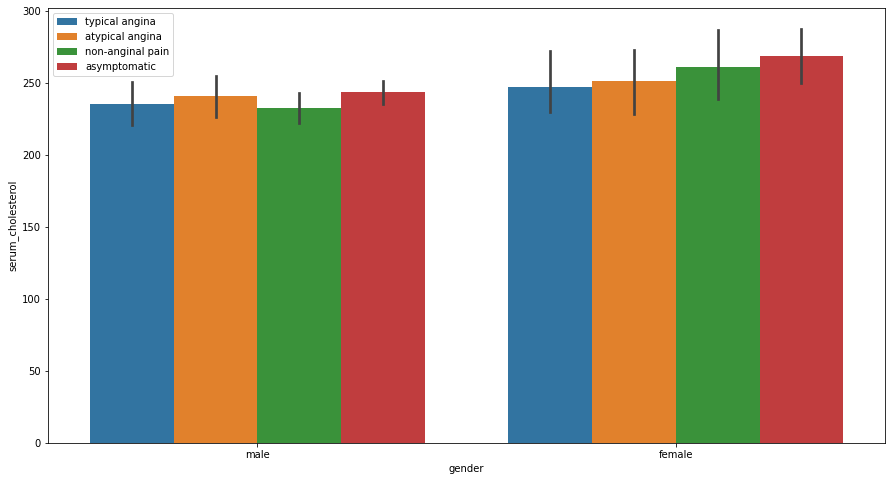

In [18]:
chestpaindesc={1:'typical angina',2:'atypical angina',3:'non-anginal pain',4:'asymptomatic'}

df['chest_pain_type_description'] = [chestpaindesc[int(i)] for i in df.chest_pain_type]

plt.figure(figsize=(15,8))
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type_description",data=df,hue_order = ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(loc = 'best')

### 12)

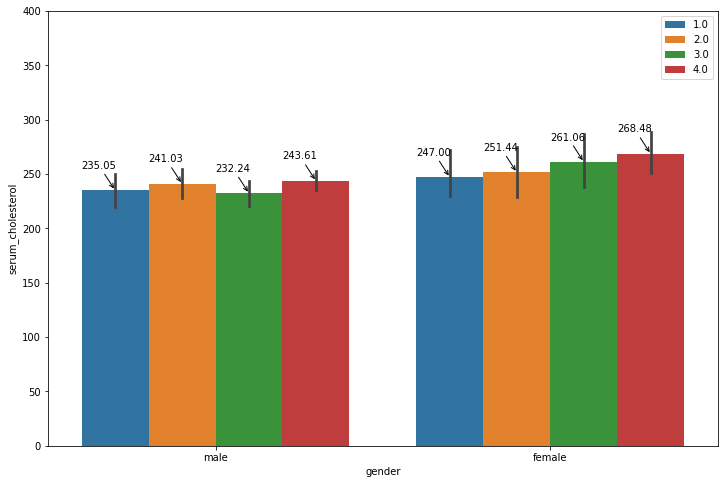

In [19]:
plt.figure(figsize=(12,8))
plot12 = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
for j in plot12.patches:
    plot12.annotate('%.2f'%j.get_height(),xy=(j.get_x()+0.5*j.get_width(),j.get_height()),xytext=(j.get_x(),j.get_height()+20),arrowprops={'arrowstyle':'->'})
plt.ylim([0,400])    
plt.legend(loc = 'best')    
    #x12.append(patch.get_x())
    #y12.append(patch.get_y())
    #vals12.append(patch.get_height())
    


### 13)

Text(1.0, 288.475, 'Slightly increasing level in females')

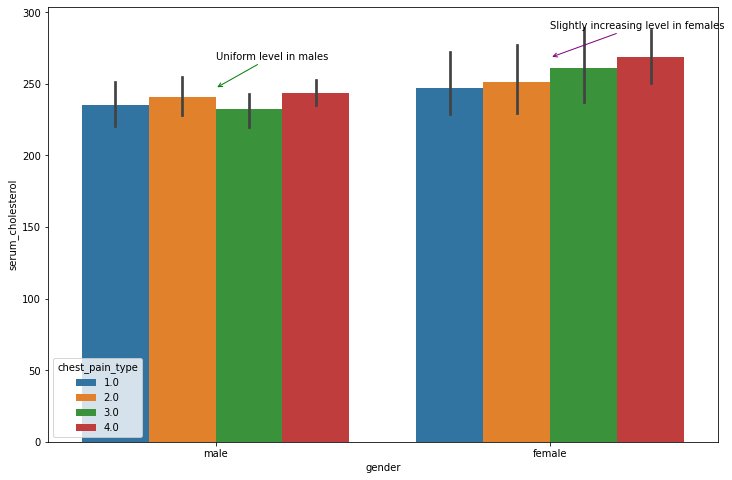

In [20]:
plt.figure(figsize=(12,8))
plot13 = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
plot13.annotate('Uniform level in males',xy=(plot13.patches[4].get_x(),plot13.patches[1].get_height()),xytext=(plot13.patches[4].get_x(),plot13.patches[1].get_height()+20),arrowprops={'arrowstyle':'->','color':'green'})
plot13.annotate('Slightly increasing level in females',xy=(plot13.patches[5].get_x(),plot13.patches[7].get_height()),xytext=(plot12.patches[5].get_x(),plot13.patches[7].get_height()+20),arrowprops={'arrowstyle':'->','color':'purple'})

### 14)

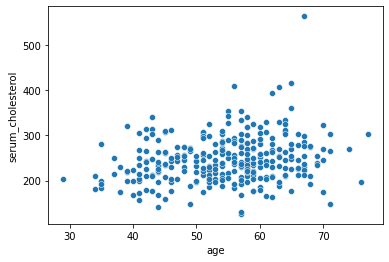

In [21]:
sns.scatterplot(x="age",y="serum_cholesterol",data=df)

Based on the scatter plot, we can say that serum cholesterol levels are more or less uniformly distributed between 150 and 400 (in the age group 35-70). there are a few outliers in between. there are comparatively few observations outside age group 35-70 so we cannot comment on them.


### 15)

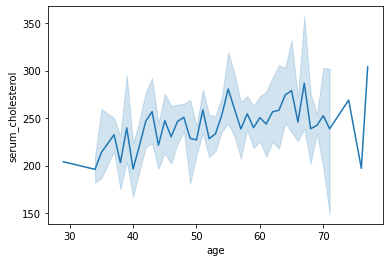

In [22]:
sns.lineplot(x="age",y="serum_cholesterol",data=df)

The dark central line indicated the mean serum cholesterol level corresponding to each age value. The light-coloured bands indicate the 95% confidence interval of serum cholesterol level. This cannot be computed for values beyond 70 and 35 since there are not enough data points corresponding to these values.

### 16)

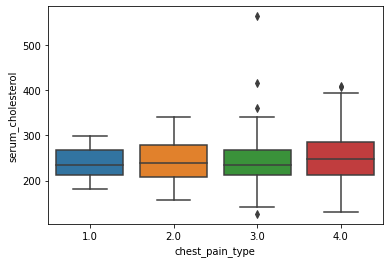

In [23]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",data=df)

For each box in the boxplot:\
The upper boundary of the box represents the 75th percentile value of serum cholesterol level for the chestpain type corresponding to the box\
The lower  boundary of the box represents the 25th percentile value  of serum cholesterol level for the chestpain type corresponding to the box\
The line inside the box represents median value of serum cholesterol level for the chestpain type corresponding to the box\
The dots beyond the error bars are the outliers.

### 17)

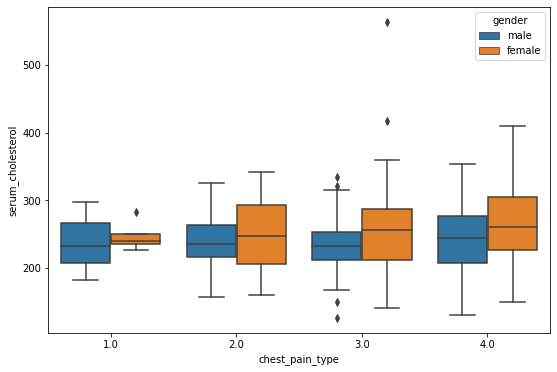

In [24]:
plt.figure(figsize=(9,6))
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

For females with chest pain type 1, the data is quite precise , hence the 1st and 3rd quartile are very close to each other. \
For males with chest pain type 3, there are quite a few outliers(4) . However these outliers are very close to the limit of the error bar. For females with chest pain type 3, There are fewer outliers(2), but they are much further away from the acceptable range than for the males, in the same group.\
For all 4 chestpain types, the median serum cholesterol level in females is higher than for males

### 18)

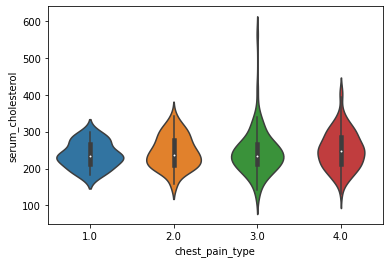

In [25]:
sns.violinplot(x='chest_pain_type',y='serum_cholesterol',data=df)

The middle dark portion of the violin mirrors the corresponding boxplot.The shape of the violin gives a measure of the skewness of the data.It can also be interpreted as a probability density function.\
Data points are more or less symmetric for chest pain type 4\
Data points are slightly positively skewed for chest pain types 1 and 2\
The data correponding to chest pain type 3 seems to be negatively skewed due to the outliers. 

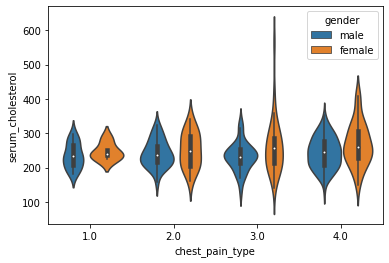

In [26]:
sns.violinplot(x='chest_pain_type',y='serum_cholesterol',data=df,hue='gender')

For all 4 chestpain types, the median serum cholesterol level in females is higher than for males.\
We can also see that the asymmetry in cholesterol levels for people with chestpain type 3 is caused due to the females.